In [1]:
#final script

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import linregress

In [3]:
### Cleaning DataFrame
## Renaming Columns
# Dropping data not needed 

In [4]:
employment_data = pd.read_csv("./Data/Unemployment and Household Income 2007-08.csv")
employment_data = employment_data.iloc[7:,]
employment_data = employment_data.rename(columns={"Unemployment and median household income for the U.S., States, and counties, 2007-18":"Unemployment Rate","Unnamed: 1": "State", "Unnamed: 2": "County/State","Unnamed: 3":"Rural 2013","Unnamed: 4":"Urban 2013","Unnamed: 5":"Metro 2013","Unnamed: 6":"CLF 2007","Unnamed: 7":"Emp 2007","Unnamed: 8":"Unemp 2007","Unnamed: 9":"Unemp Rate 2007","Unnamed: 10":"CLF 2008","Unnamed: 11":"Emp 2008","Unnamed: 12":"Unemp 2008","Unnamed: 13":"Unemp Rate 2008","Unnamed: 14":"CLF 2009","Unnamed: 15":"Emp 2009","Unnamed: 16":"Unemp 2009","Unnamed: 17":"Unemp Rate 2009","Unnamed: 18":"CLF 2010","Unnamed: 19":"Emp 2010","Unnamed: 20":"Unemp 2010","Unnamed: 21":"Unemp Rate 2010","Unnamed: 22":"CLF 2011","Unnamed: 23":"Emp 2011","Unnamed: 24":"Unemp 2011","Unnamed: 25":"Unemp Rate 2011","Unnamed: 26":"CLF 2012","Unnamed: 27":"Emp 2012","Unnamed: 28":"Unemp 2012","Unnamed: 29":"Unemp Rate 2012","Unnamed: 30":"CLF 2013","Unnamed: 31":"Emp 2013","Unnamed: 32":"Unemp 2013","Unnamed: 33":"Unemp Rate 2013","Unnamed: 34":"CLF 2014","Unnamed: 35":"Emp 2014","Unnamed: 36":"Unemp 2014","Unnamed: 37":"Unemp Rate 2014","Unnamed: 38":"CLF 2015","Unnamed: 39":"Emp 2015","Unnamed: 40":"Unemp 2015","Unnamed: 41":"Unemp Rate 2015","Unnamed: 42":"CLF 2016","Unnamed: 43":"Emp 2016","Unnamed: 44":"Unemp 2016","Unnamed: 45":"Unemp Rate 2016","Unnamed: 46":"CLF 2017","Unnamed: 47":"Emp 2017","Unnamed: 48":"Unemp 2017","Unnamed: 49":"Unemp Rate 2017","Unnamed: 50":"CLF 2018","Unnamed: 51":"Emp 2018","Unnamed: 52":"Unemp 2018","Unnamed: 53":"Unemp Rate 2018", "Unnamed: 54": "Median Household Income 2017", "Unnamed: 55": "Median HH Income (%) 2017"})
employment_data = employment_data.drop(["Unemployment Rate","Rural 2013", "Urban 2013", "Metro 2013"], axis=1)
employment_data_only = employment_data.drop(["Median Household Income 2017", "Median HH Income (%) 2017"], axis=1)
employment_data = employment_data.set_index("State")
employment_data = employment_data.drop('PR')

employment_data_only = employment_data_only.set_index("State")
employment_data_only = employment_data_only.drop('PR')
employment_data_only = employment_data_only.fillna('-')
employment_data = employment_data.fillna('-')
employment_data.head()

,County/State,CLF 2007,Emp 2007,Unemp 2007,Unemp Rate 2007,CLF 2008,Emp 2008,Unemp 2008,Unemp Rate 2008,CLF 2009,...,CLF 2017,Emp 2017,Unemp 2017,Unemp Rate 2017,CLF 2018,Emp 2018,Unemp 2018,Unemp Rate 2018,Median Household Income 2017,Median HH Income (%) 2017
State,,,,,,,,,,,,,,,,,,,,,
US,United States,"152,191,093","145,156,134","7,034,959",4.6,153761095,144860350,8900745,5.8,"153,825,455",...,"160,273,906","153,293,830","6,980,076",4.4,"161,640,488","155,344,043","6,296,445",3.9,"$60,336",-
AL,Alabama,"2,175,612","2,089,127","86,485",4,"2,176,489","2,053,477","123,012",5.7,2162999,...,2178243,2081676,96567,4.4,"2,198,837","2,112,347","86,490",3.9,"$48,193",100
AL,"Autauga County, AL","24,383","23,577",806,3.3,"24,687","23,420","1,267",5.1,24703,...,25972,24958,1014,3.9,"25,957","25,015",942,3.6,"$58,343",121.1
AL,"Baldwin County, AL","82,659","80,099","2,560",3.1,"83,223","79,372","3,851",4.6,82451,...,92090,88342,3748,4.1,"93,849","90,456","3,393",3.6,"$56,607",117.5
AL,"Barbour County, AL","10,334","9,684",650,6.3,"10,161","9,267",894,8.8,10003,...,8317,7831,486,5.8,"8,373","7,940",433,5.2,"$32,490",67.4


In [5]:
## Changing data strings to floats

In [6]:
def parseFloat(data):
    parsedData = re.sub( '[^\d\.]', '', data)
    return (re.sub( '[^\d\.]', '', data)) if parsedData else 0
employment_d = employment_data_only.iloc[:,1:].applymap(parseFloat)
e = employment_d.astype('float')
e['State'] = employment_data_only['County/State']

In [7]:
## Creating Lists to be iterated through for each state and each year involved in study

In [8]:
state_abrev = ["AL", 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS','KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
states = ["Alabama", 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas','Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
years = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]

In [9]:
## Seperating Data into only U.S. Unemployment Rates

In [10]:
def us_unemployment(source):
    return source[["Unemp Rate 2007", "Unemp Rate 2008", 'Unemp Rate 2009',"Unemp Rate 2010", "Unemp Rate 2011", 'Unemp Rate 2012',"Unemp Rate 2013", "Unemp Rate 2014", 'Unemp Rate 2015',"Unemp Rate 2016", "Unemp Rate 2017", 'Unemp Rate 2018']]
us_data = e.iloc[:1]
us_unemployment = us_unemployment(us_data)

In [11]:
## Locating Data on specific States

In [12]:
def parse_employment_data(state):
    return e.loc[e['State']== state]


In [13]:
## Seperating Data by state and Unemployment Rate

In [14]:
def state_unemp(source):
    state = e_states.loc[e_states['State'] == source]
    return state[["Unemp Rate 2007", "Unemp Rate 2008", 'Unemp Rate 2009',"Unemp Rate 2010", "Unemp Rate 2011", 'Unemp Rate 2012',"Unemp Rate 2013", "Unemp Rate 2014", 'Unemp Rate 2015',"Unemp Rate 2016", "Unemp Rate 2017", 'Unemp Rate 2018']]


In [15]:
## collecting data on each state and creating a data frame on only states information
# deleting county information

In [16]:
state_data = []
employment_data_by_state = {}
for state in states:
    employment_data_by_state[state] = {
        "employment_data": parse_employment_data(state)
    }
    state_data.append(employment_data_by_state[state]["employment_data"])
e_states = pd.concat(state_data, axis=0)
e_states.head()

,CLF 2007,Emp 2007,Unemp 2007,Unemp Rate 2007,CLF 2008,Emp 2008,Unemp 2008,Unemp Rate 2008,CLF 2009,Emp 2009,...,Unemp Rate 2016,CLF 2017,Emp 2017,Unemp 2017,Unemp Rate 2017,CLF 2018,Emp 2018,Unemp 2018,Unemp Rate 2018,State
State,,,,,,,,,,,,,,,,,,,,,
AL,2175612.0,2089127.0,86485.0,4.0,2176489.0,2053477.0,123012.0,5.7,2162999.0,1924747.0,...,5.8,2178243.0,2081676.0,96567.0,4.4,2198837.0,2112347.0,86490.0,3.9,Alabama
AK,350785.0,328579.0,22206.0,6.3,356109.0,332285.0,23824.0,6.7,359647.0,331792.0,...,6.9,360759.0,335682.0,25077.0,7.0,356886.0,333375.0,23511.0,6.6,Alaska
AZ,3034016.0,2917117.0,116899.0,3.9,3104863.0,2913903.0,190960.0,6.2,3128110.0,2817577.0,...,5.4,3327949.0,3165127.0,162822.0,4.9,3439755.0,3273550.0,166205.0,4.8,Arizona
AR,1369284.0,1296572.0,72712.0,5.3,1375257.0,1300017.0,75240.0,5.5,1358911.0,1252399.0,...,4.0,1347630.0,1297652.0,49978.0,3.7,1351496.0,1301459.0,50037.0,3.7,Arkansas
CA,17893080.0,16931590.0,961490.0,5.4,18178123.0,16854482.0,1323641.0,7.3,18215140.0,16182572.0,...,5.5,19205295.0,18285492.0,919803.0,4.8,19398212.0,18582802.0,815410.0,4.2,California


In [17]:
## Locating only unemployment rate for each state
# Creating a new data frame

In [18]:
unemployment_state_data = []
unemployment_data_by_state = {}
for state in states:
    unemployment_data_by_state[state] = {
        'unemployment_data': state_unemp(state)
    }
    unemployment_state_data.append(unemployment_data_by_state[state]['unemployment_data'])
    
unemp_states = pd.concat(unemployment_state_data, axis=0)
unemp_states.head()

,Unemp Rate 2007,Unemp Rate 2008,Unemp Rate 2009,Unemp Rate 2010,Unemp Rate 2011,Unemp Rate 2012,Unemp Rate 2013,Unemp Rate 2014,Unemp Rate 2015,Unemp Rate 2016,Unemp Rate 2017,Unemp Rate 2018
State,,,,,,,,,,,,
AL,4.0,5.7,11.0,10.5,9.6,8.0,7.2,6.8,6.1,5.8,4.4,3.9
AK,6.3,6.7,7.7,7.9,7.6,7.1,7.0,6.9,6.5,6.9,7.0,6.6
AZ,3.9,6.2,9.9,10.4,9.5,8.3,7.7,6.8,6.1,5.4,4.9,4.8
AR,5.3,5.5,7.8,8.2,8.3,7.6,7.2,6.0,5.0,4.0,3.7,3.7
CA,5.4,7.3,11.2,12.2,11.7,10.4,8.9,7.5,6.2,5.5,4.8,4.2


In [19]:
#adding median house price data to data frame

In [20]:
housing_data = pd.read_csv('./housing_data')
housing_data = housing_data.set_index("State")

In [21]:
def convert_year(year):
    yr = housing_data.loc[housing_data['Year']==year]
    del yr['Year']
    e_states[f'Median House Price {year}'] = yr

In [22]:
for year in years:
    convert_year(year)


In [23]:
## Seperating median house price by year for each state

In [24]:
def state_house_price(state):
    st = e_states.loc[e_states['State'] == state]
    return st[["Median House Price 2007","Median House Price 2008","Median House Price 2009","Median House Price 2010","Median House Price 2011","Median House Price 2012","Median House Price 2013","Median House Price 2014","Median House Price 2015","Median House Price 2016","Median House Price 2017","Median House Price 2018"]]

In [27]:
## Locating only house price data on specific state

In [28]:
state_price_house = []
states_house_price = {}
for state in states:
    states_house_price[state] = {
        'house_price': state_house_price(state)
    }
states_house_price['Alabama']['house_price']

,Median House Price 2007,Median House Price 2008,Median House Price 2009,Median House Price 2010,Median House Price 2011,Median House Price 2012,Median House Price 2013,Median House Price 2014,Median House Price 2015,Median House Price 2016,Median House Price 2017,Median House Price 2018
State,,,,,,,,,,,,
AL,296060,305180,305450,289780,279240,277120,274880,275520,284250,290090,299640,311320


In [30]:
## function for finding linear regession 

In [31]:
def lineregress(x,y):
    slope, intercept, rvalue, p_value, std_err =linregress(x, y)   
    plt.plot(x, [intercept + slope*val for val in x], 'r')
    print(f"R-value: {rvalue}")

In [34]:
## bin states by size of CLF and finding the unemployment rate for each bin

In [35]:
def sep_unemp_population(size):
    pop=e_states.loc[e_states["CLF Pop"]== size]
    return pop[["Unemp Rate 2007","Unemp Rate 2008","Unemp Rate 2009","Unemp Rate 2010","Unemp Rate 2011","Unemp Rate 2012","Unemp Rate 2013","Unemp Rate 2014","Unemp Rate 2015","Unemp Rate 2016","Unemp Rate 2017","Unemp Rate 2018"]]


In [36]:
## function to bin states by CFL size and finding the median house price for each year

In [37]:
def med_house_price_size(size):
    pop=e_states.loc[e_states["CLF Pop"]== size]
    return pop[["Median House Price 2007","Median House Price 2008","Median House Price 2009","Median House Price 2010","Median House Price 2011","Median House Price 2012","Median House Price 2013","Median House Price 2014","Median House Price 2015","Median House Price 2016","Median House Price 2017","Median House Price 2018"]]

In [38]:
## binning states by size of CLF

In [39]:
bins = [0,1000000,2000000,3000000,4000000,5000000,20000000]
group_names = ["<1,000,000","1,000,000-2,000,000","2,000,000-3,000,000","3,000,000-4,000,000","4,000,000-5,000,000","5,000,000+"]
e_states["CLF Pop"] = pd.cut(e_states["CLF 2018"], bins, labels=group_names)
e_states = e_states.set_index("State")
unemp_by_size = {}
for x in group_names:
    unemp_by_size[x] = {
    'unemp_by_size': sep_unemp_population(x)
    }


In [40]:
e_states.head()

,CLF 2007,Emp 2007,Unemp 2007,Unemp Rate 2007,CLF 2008,Emp 2008,Unemp 2008,Unemp Rate 2008,CLF 2009,Emp 2009,...,Median House Price 2010,Median House Price 2011,Median House Price 2012,Median House Price 2013,Median House Price 2014,Median House Price 2015,Median House Price 2016,Median House Price 2017,Median House Price 2018,CLF Pop
State,,,,,,,,,,,,,,,,,,,,,
Alabama,2175612.0,2089127.0,86485.0,4.0,2176489.0,2053477.0,123012.0,5.7,2162999.0,1924747.0,...,289780,279240,277120,274880,275520,284250,290090,299640,311320,"2,000,000-3,000,000"
Alaska,350785.0,328579.0,22206.0,6.3,356109.0,332285.0,23824.0,6.7,359647.0,331792.0,...,275120,279650,279760,287540,290040,301500,311100,314950,319680,"<1,000,000"
Arizona,3034016.0,2917117.0,116899.0,3.9,3104863.0,2913903.0,190960.0,6.2,3128110.0,2817577.0,...,272500,241700,235460,262100,296590,311550,334420,359580,392080,"3,000,000-4,000,000"
Arkansas,1369284.0,1296572.0,72712.0,5.3,1375257.0,1300017.0,75240.0,5.5,1358911.0,1252399.0,...,245360,241680,242860,246450,248260,252940,259010,269730,280120,"1,000,000-2,000,000"
California,17893080.0,16931590.0,961490.0,5.4,18178123.0,16854482.0,1323641.0,7.3,18215140.0,16182572.0,...,408550,390560,379790,405620,473400,506030,546890,586810,635540,"5,000,000+"


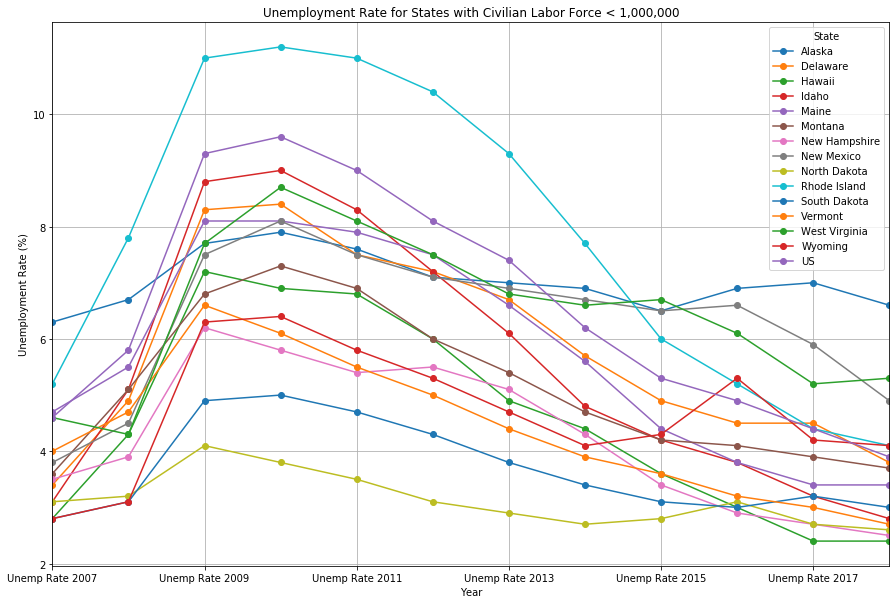

In [60]:
add_us =[unemp_by_size["<1,000,000"]['unemp_by_size'],us_unemployment]
results01 = pd.concat(add_us, axis=0)
results01.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Civilian Labor Force < 1,000,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()
plt.savefig(r'1m_CLF_unemp')

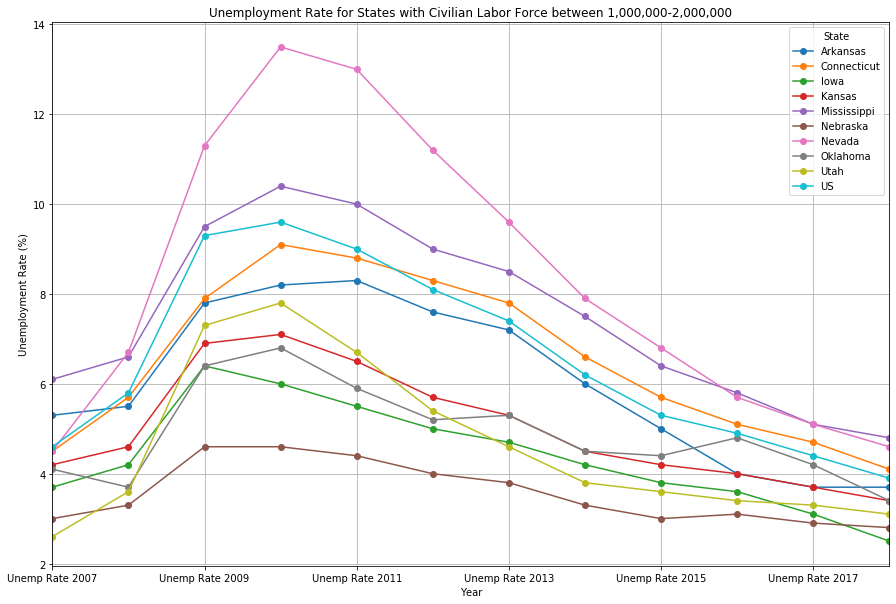

In [61]:
add_us1 =[unemp_by_size["1,000,000-2,000,000"]['unemp_by_size'],us_unemployment]
results02 = pd.concat(add_us1, axis=0)
results02.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Civilian Labor Force between 1,000,000-2,000,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()

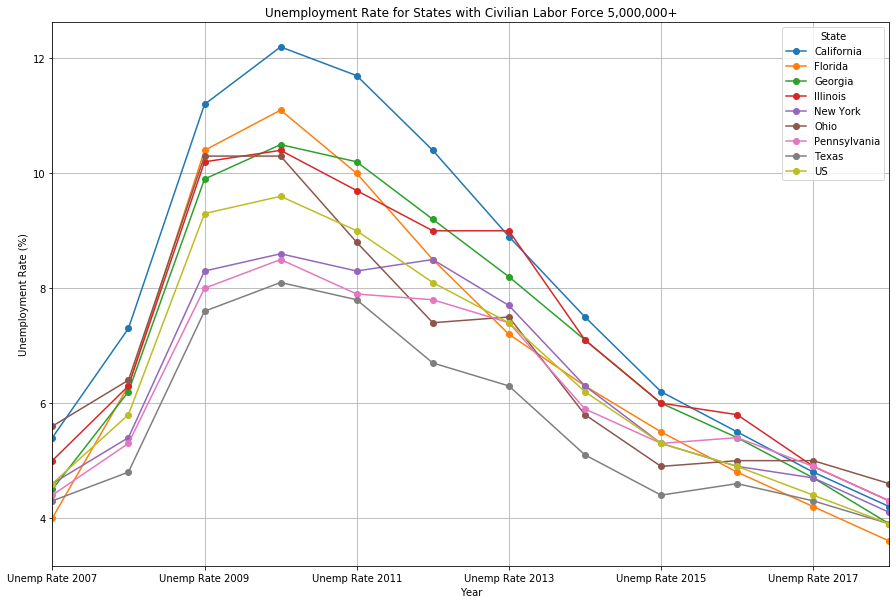

In [62]:
add_us5 =[unemp_by_size["5,000,000+"]['unemp_by_size'],us_unemployment]
results06 = pd.concat(add_us5, axis=0)
results06.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Civilian Labor Force 5,000,000+")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel('Year')
plt.grid()
plt.savefig(r'5m_CLF_unemp')

In [41]:
## binning states by size of CLF and comparing house price

In [42]:

house_price_by_size_of_state = {}
for y in group_names:
    house_price_by_size_of_state[y] = {
        'house_price_by_size': med_house_price_size(y)
    }
house_price_by_size_of_state['<1,000,000']['house_price_by_size'].head()

,Median House Price 2007,Median House Price 2008,Median House Price 2009,Median House Price 2010,Median House Price 2011,Median House Price 2012,Median House Price 2013,Median House Price 2014,Median House Price 2015,Median House Price 2016,Median House Price 2017,Median House Price 2018
State,,,,,,,,,,,,
Alaska,280610,281670,281750,275120,279650,279760,287540,290040,301500,311100,314950,319680
Delaware,498950,494750,473950,441040,422480,408400,406090,409870,423630,429290,442070,460310
Hawaii,540600,530960,492570,451520,442210,446580,459280,495560,530810,566130,591570,621150
Idaho,338260,340790,324370,285030,258040,255600,265000,280770,295910,316830,340790,380660
Maine,505590,508000,489150,459360,452110,446270,446330,445630,460680,473990,498550,523320


In [43]:
## binning states by starting median house price in 2007

In [44]:
bins1 = [100000,250000,300000,400000,500000,800000]
group_names1 = ["100,000-250,000","250,000-300,000","300,000-400,000","400,000-500,000","500,000+"]
e_states["Starting House Price"] = pd.cut(e_states["Median House Price 2007"], bins1, labels=group_names1)


In [45]:
def start_house_price_group(price):
    pop=e_states.loc[e_states["Starting House Price"]== price]
    return pop[["Median House Price 2007","Median House Price 2008","Median House Price 2009","Median House Price 2010","Median House Price 2011","Median House Price 2012","Median House Price 2013","Median House Price 2014","Median House Price 2015","Median House Price 2016","Median House Price 2017","Median House Price 2018"]]

In [66]:
grouped_house_price = {}
for i in group_names1:
    grouped_house_price[i] = {
        'gr_house_price': start_house_price_group(i)
    }

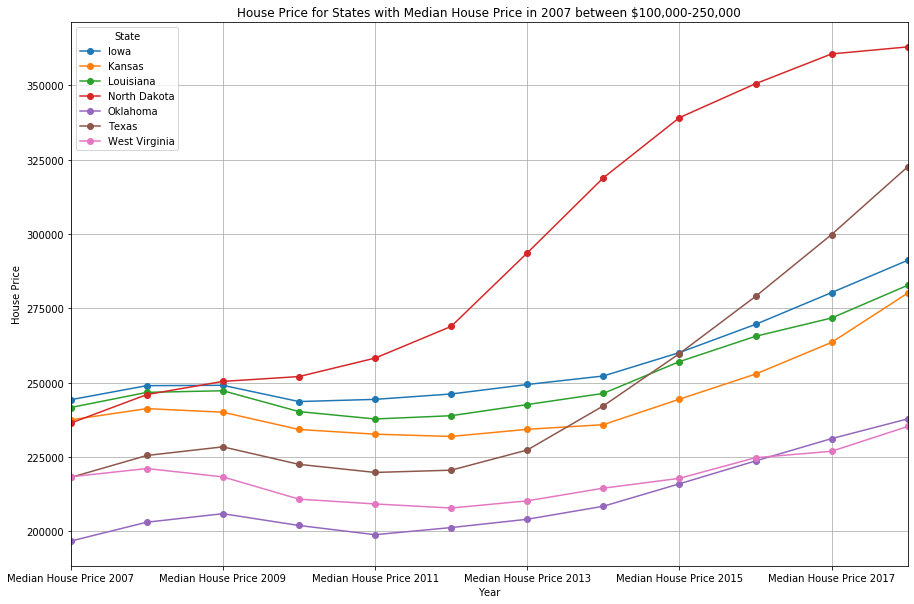

In [67]:
grouped_house_price["100,000-250,000"]['gr_house_price'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Median House Price in 2007 between $100,000-250,000")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()
plt.savefig(r'Starting_House_Price_100-250')

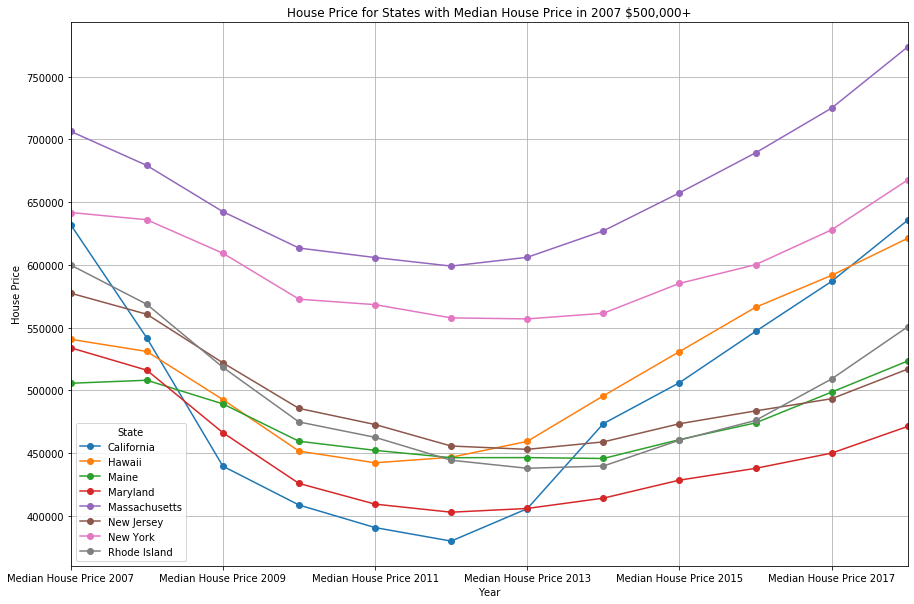

In [68]:
grouped_house_price["500,000+"]['gr_house_price'].T.plot.line(figsize=(15,10),marker='o')
plt.title("House Price for States with Median House Price in 2007 $500,000+")
plt.ylabel("House Price")
plt.xlabel("Year")
plt.grid()
plt.savefig(r'Starting_House_Price_500+')

In [46]:
## binning states by price of home in 2007 then comparing the unemployment rate of those states

In [47]:
def unemployment_by_start_house_price(price):
    pop = e_states.loc[e_states["Starting House Price"]== price]
    return pop[["Unemp Rate 2007","Unemp Rate 2008","Unemp Rate 2009","Unemp Rate 2010","Unemp Rate 2011","Unemp Rate 2012","Unemp Rate 2013","Unemp Rate 2014","Unemp Rate 2015","Unemp Rate 2016","Unemp Rate 2017","Unemp Rate 2018"]]


In [48]:
unemp_by_house_price = {}
for a in group_names1:
    unemp_by_house_price[a] = {
        'unemp_by_price': unemployment_by_start_house_price(a)
    }

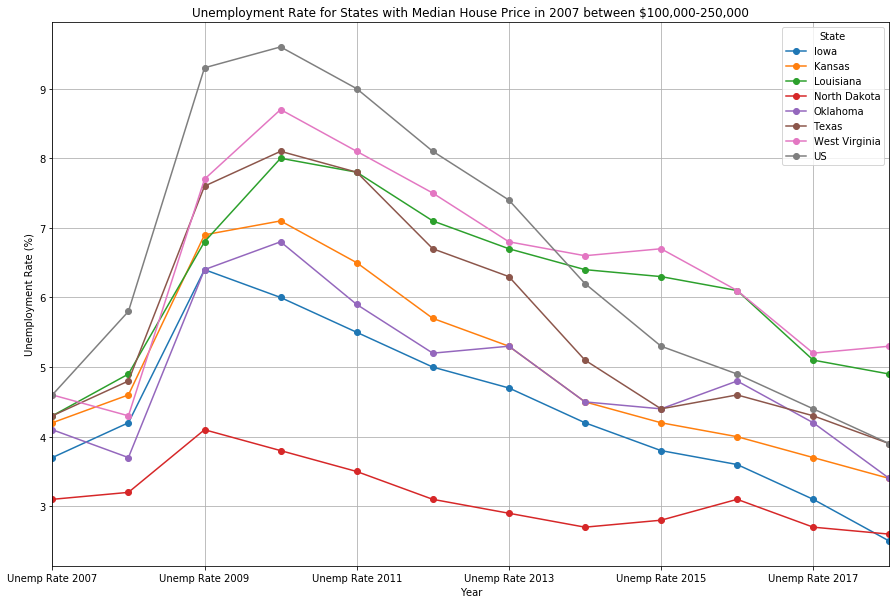

In [49]:
frame3 = [unemp_by_house_price['100,000-250,000']['unemp_by_price'],us_unemployment]
results4 = pd.concat(frame3, axis=0)
results4.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Median House Price in 2007 between $100,000-250,000")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()
plt.savefig(r'unemp_house_price_1m_2m')

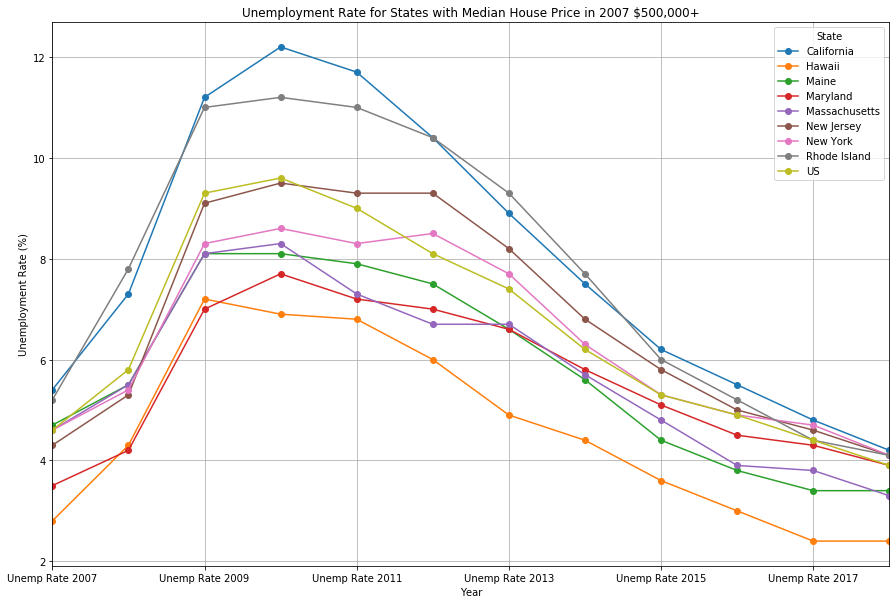

In [50]:
frame = [unemp_by_house_price['500,000+']['unemp_by_price'],us_unemployment]
results1 = pd.concat(frame, axis=0)
results1.T.plot.line(figsize=(15,10), marker='o')
plt.title("Unemployment Rate for States with Median House Price in 2007 $500,000+")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Year")
plt.grid()
plt.savefig(r'unemp_by_house_price_5m')

In [51]:
## identifying which states to loop through and create graphics 

In [73]:
new_states = ["Rhode Island", "California", "North Dakota"]

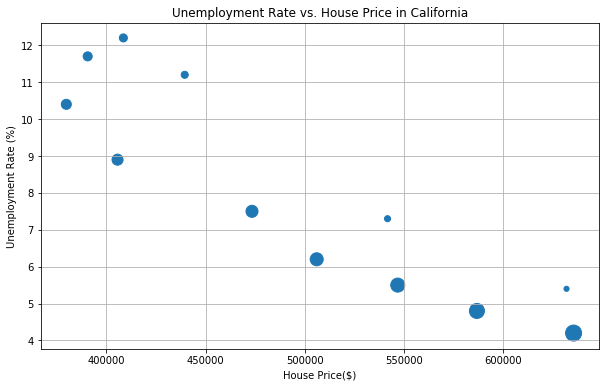

In [74]:

plt.figure(figsize=(10,6))
plt.scatter(states_house_price["California"]['house_price'],unemployment_data_by_state["California"]['unemployment_data'], s = [((n+5)**2)+1 for n in range(len(years))])
plt.xlabel("House Price($)")
plt.ylabel("Unemployment Rate (%)")
plt.grid()
plt.title(f"Unemployment Rate vs. House Price in California")
plt.savefig(r"unemp_house_price_cali")

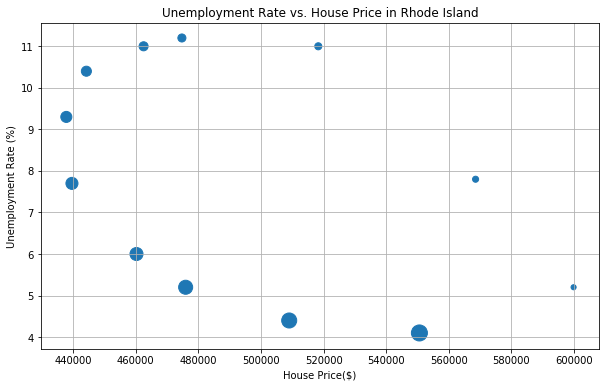

In [75]:
plt.figure(figsize=(10,6))
plt.scatter(states_house_price["Rhode Island"]['house_price'],unemployment_data_by_state["Rhode Island"]['unemployment_data'], s = [((n+5)**2)+1 for n in range(len(years))])
plt.xlabel("House Price($)")
plt.ylabel("Unemployment Rate (%)")
plt.grid()
plt.title(f"Unemployment Rate vs. House Price in Rhode Island")
plt.savefig(r"unemp_house_price_rhode_island")

R-value: -0.35464364235618345


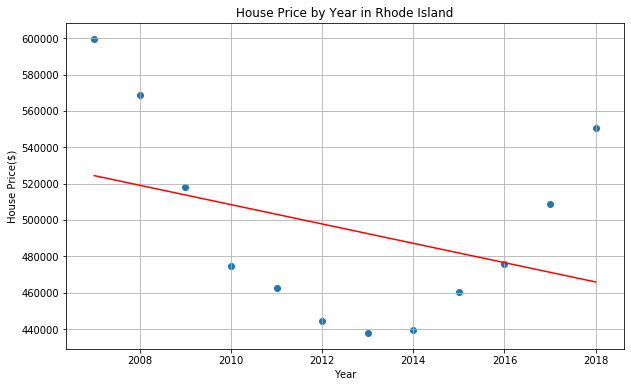

In [76]:

plt.figure(figsize=(10,6))
lineregress(years, states_house_price["Rhode Island"]['house_price'])
plt.scatter(years,states_house_price["Rhode Island"]['house_price'])
plt.title(f"House Price by Year in Rhode Island")
plt.xlabel("Year")
plt.ylabel("House Price($)")
plt.grid()
plt.savefig(r'house_price_by_year_RI')

R-value: 0.2654784524714281


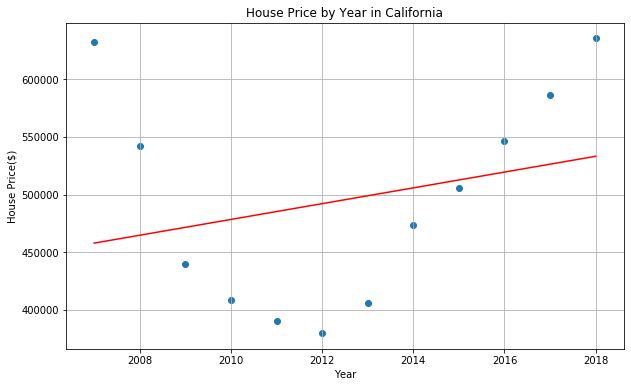

In [77]:
plt.figure(figsize=(10,6))
lineregress(years, states_house_price["California"]['house_price'])
plt.scatter(years,states_house_price["California"]['house_price'])
plt.title(f"House Price by Year in California")
plt.xlabel("Year")
plt.ylabel("House Price($)")
plt.grid()
plt.savefig(r'house_price_by_year_cali')

R-value: -0.5519059978558892


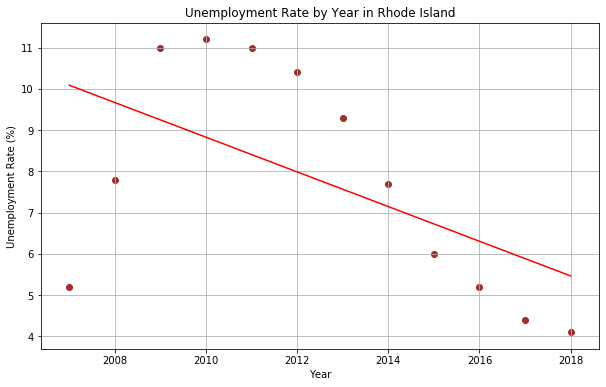

In [78]:

    plt.figure(figsize=(10,6))
    lineregress(years,unemployment_data_by_state["Rhode Island"]['unemployment_data'])
    plt.scatter(years,unemployment_data_by_state["Rhode Island"]['unemployment_data'], c='brown')
    plt.title(f"Unemployment Rate by Year in Rhode Island")
    plt.xlabel("Year")
    plt.ylabel("Unemployment Rate (%)")
    plt.grid()
    plt.savefig(r'unemp_by_year_RI')

R-value: -0.5282415264036183


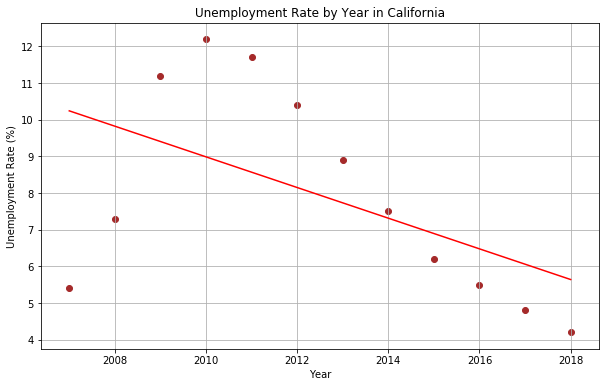

In [79]:
plt.figure(figsize=(10,6))
lineregress(years,unemployment_data_by_state["California"]['unemployment_data'])
plt.scatter(years,unemployment_data_by_state["California"]['unemployment_data'], c='brown')
plt.title(f"Unemployment Rate by Year in California")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid()
plt.savefig(r'unemp_by_year_cali')